In [148]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [149]:
bank=pd.read_csv('bank-full (1).csv', delimiter= ";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [150]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [151]:
print('job = ', bank['job'].unique())
print('marital = ', bank['marital'].unique())
print('education = ', bank['education'].unique())
print('default = ', bank['default'].unique())
print('housing = ', bank['housing'].unique())
print('loan = ', bank['loan'].unique())
print('contact = ', bank['contact'].unique())
print('month = ', bank['month'].unique())
print('poutcome = ',bank['poutcome'].unique())
print('y = ',bank['y'].unique())

job =  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital =  ['married' 'single' 'divorced']
education =  ['tertiary' 'secondary' 'unknown' 'primary']
default =  ['no' 'yes']
housing =  ['yes' 'no']
loan =  ['no' 'yes']
contact =  ['unknown' 'cellular' 'telephone']
month =  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome =  ['unknown' 'failure' 'other' 'success']
y =  ['no' 'yes']


In [152]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [153]:
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [154]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [155]:
bank=pd.get_dummies(bank,columns=['job'])

In [156]:
bank=pd.get_dummies(bank,columns=['marital'])

In [157]:
bank=pd.get_dummies(bank,columns=['education'])

In [158]:
bank=pd.get_dummies(bank,columns=['contact'])

In [159]:
bank=pd.get_dummies(bank,columns=['month'])

In [160]:
bank=pd.get_dummies(bank,columns=['poutcome'])

In [161]:
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})

In [162]:
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})

In [163]:
bank['loan'] = bank['loan'].map({'yes': 1, 'no': 0})

In [164]:
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [165]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [166]:
column_name = bank.columns[10]
column = bank.pop(column_name)


bank.insert(len(bank.columns), column_name, column)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
X = bank.iloc[:,:48]
y = bank.iloc[:,48:]

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

In [184]:
X_train.shape, X_test.shape

((36168, 48), (9043, 48))

In [185]:
y_train.shape, y_test.shape

((36168, 1), (9043, 1))

In [186]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [187]:
ytrain_predicted = model.predict(X_train)


In [ ]:
model.predict_proba(X_train)

array([[0.40056613, 0.59943387],
       [0.73375557, 0.26624443],
       [0.32930144, 0.67069856],
       ...,
       [0.29095193, 0.70904807],
       [0.30276242, 0.69723758],
       [0.32488428, 0.67511572]])

In [188]:
accuracy_score(y_train, ytrain_predicted)

0.8925016589250165

In [189]:
confusion_matrix(y_train, ytrain_predicted)

array([[31353,   617],
       [ 3271,   927]])

In [190]:
print(classification_report(y_train, ytrain_predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     31970
           1       0.60      0.22      0.32      4198

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



Text(0, 0.5, 'True Positive Rate')

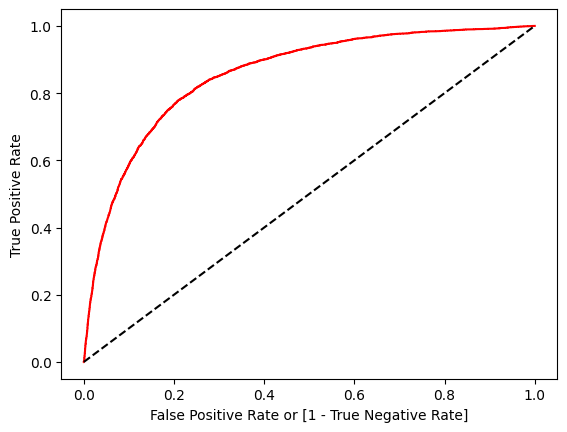

In [191]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_train, ytrain_predicted)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Predictions for X_test and y_test

In [192]:
ytest_predicted = model.predict(X_test)


In [193]:
model.predict_proba(X_test)

array([[0.97941119, 0.02058881],
       [0.96307709, 0.03692291],
       [0.84301063, 0.15698937],
       ...,
       [0.97519631, 0.02480369],
       [0.98325544, 0.01674456],
       [0.94975828, 0.05024172]])

In [194]:
accuracy_score(y_test, ytest_predicted)

0.8891960632533451

In [195]:
confusion_matrix(y_test, ytest_predicted)

array([[7797,  155],
       [ 847,  244]])

In [196]:
print(classification_report(y_test, ytest_predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.22      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



Text(0, 0.5, 'True Positive Rate')

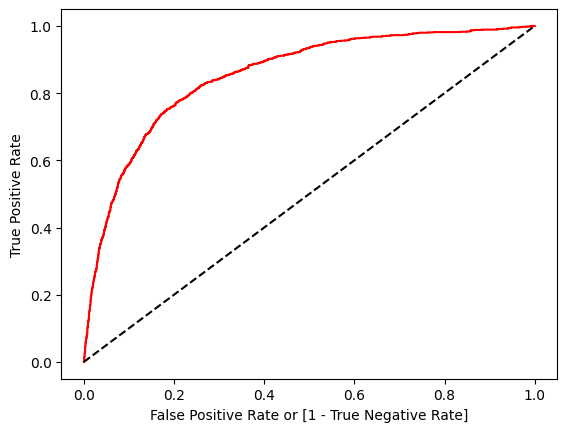

In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, ytest_predicted)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')